### Grid based-filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import dataset_loader, SCPlot


sc, coordinates = dataset_loader.load_paper_data()
# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


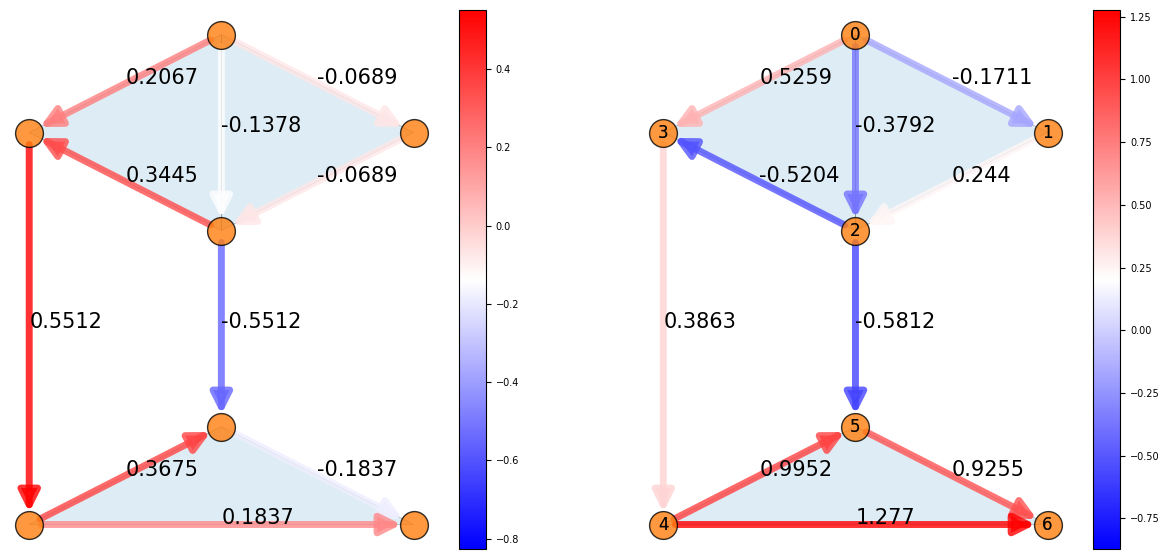

In [3]:
f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
f = np.array([-0.1711, -0.3792, 0.5259, 0.2440, -0.5204, -0.5812, 0.3863, 0.9952, 1.2770, 0.9255])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

In [4]:
from sclibrary.filters import GridBasedFilterDesign

gbf = GridBasedFilterDesign(sc)

#### Denoising

mu: 0.5, error: 0.8084101992297972
Filter size: 0 - Error: 1.1145220187619012
Filter size: 1 - Error: 0.9174238859255925
Filter size: 2 - Error: 0.7980897263179785
Filter size: 3 - Error: 0.8097442535275531
Filter size: 4 - Error: 0.8105673351540454
Filter size: 5 - Error: 0.8081901125729355
Filter size: 6 - Error: 0.8084003631752389
Filter size: 7 - Error: 0.808413695106161
Filter size: 8 - Error: 0.8083988982483638
Filter size: 9 - Error: 0.8084065150260697
Filter size: 10 - Error: 0.8083506099008334
Filter size: 11 - Error: 0.8080688641361645
Filter size: 12 - Error: 0.8067575236384018
Filter size: 13 - Error: 0.8009861267673423
Filter size: 14 - Error: 0.7891291622989668


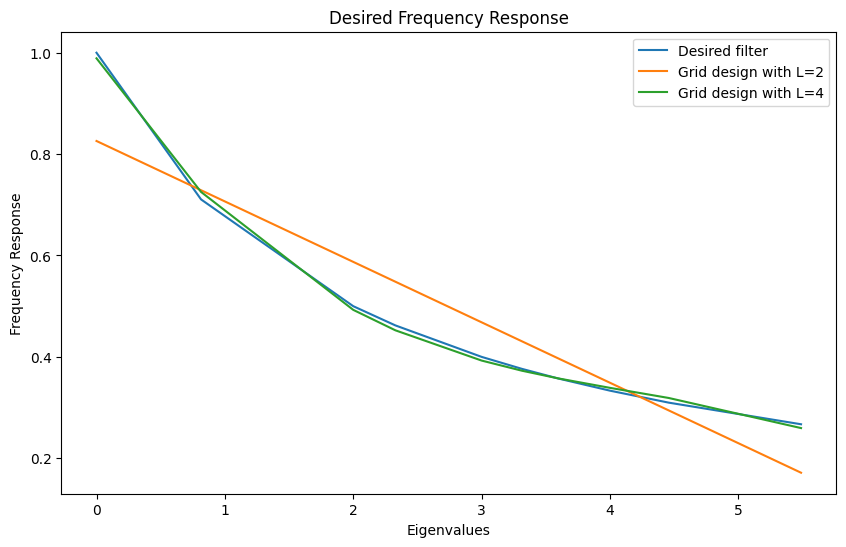

In [8]:
from sclibrary.filters import EdgeFlowDenoising
import matplotlib.pyplot as plt
from sclibrary.utils.eigendecomposition import get_eigendecomposition
   

    
efd = EdgeFlowDenoising(simplicial_complex=sc)
efd.denoise(f=f, f_true=f0, p_choice="L1")
efd.plot_desired_frequency_response(p_choice="L1")

_, eigenvals = get_eigendecomposition(sc.hodge_laplacian_matrix().toarray())
gbf = GridBasedFilterDesign(sc)
gbf.denoise(f=f, f_true=f0,  L=15, p_choice="L1", mu=0.5)
plt.plot(eigenvals, gbf.history["frequency_responses"][1])
plt.plot(eigenvals, gbf.history["frequency_responses"][3])

plt.legend(["Desired filter", "Grid design with L=2", "Grid design with L=4"])

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


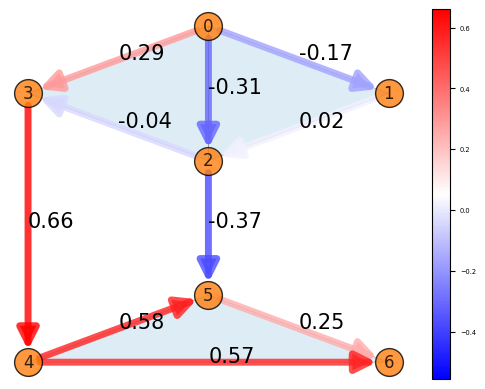

In [9]:
f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 1.2568819762196597
Filter size: 1 - Error: 1.3739318294632703
Filter size: 2 - Error: 1.37393182946327
Filter size: 3 - Error: 1.3531956877920341


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


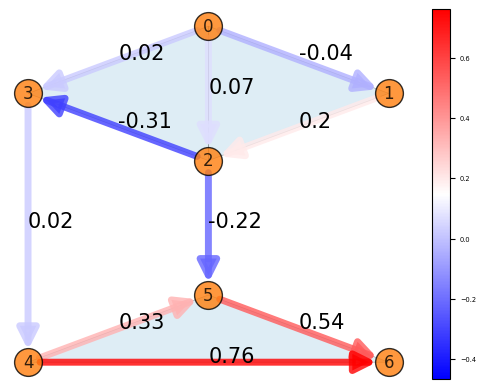

In [10]:
filter_size = 4

gbf.subcomponent_extraction(f=f, f_true=f0,  
                            L=filter_size, p_choice="L1L", component="gradient")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.6797820358640858
Filter size: 1 - Error: 0.5000979157188821
Filter size: 2 - Error: 0.3142777749528222
Filter size: 3 - Error: 0.15691722975143893
Filter size: 4 - Error: 0.06850973331983584
Filter size: 5 - Error: 0.03177941823350571
Filter size: 6 - Error: 0.01810825250934189
Filter size: 7 - Error: 0.011540591584127584
Filter size: 8 - Error: 0.006144796322897418
Filter size: 9 - Error: 0.003907212994412229


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


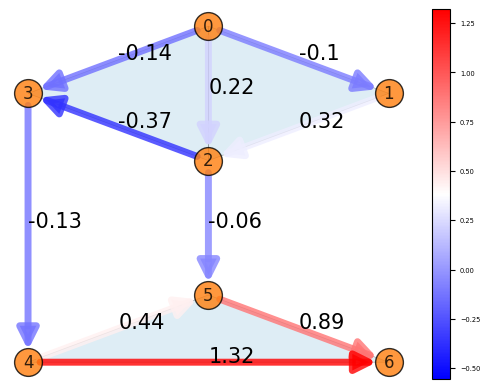

In [11]:
filter_size = 10

f_true = gbf.get_true_signal(f=f, component="gradient")
gbf.subcomponent_extraction(f=f, f_true=f_true,  L=filter_size, p_choice="L1L")

f_est = gbf.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est, 2))

#### General Filter

Filter size: 0 - Error: 1.2568819762196597
Filter size: 0 - Error: 0.9289163381597936


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


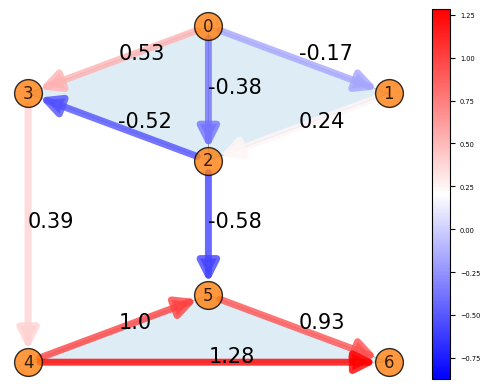

In [12]:

gbf = GridBasedFilterDesign(sc)

f_est_h, f_est_c, f_est_g = gbf.general_filter(
     f=f, f_true=f0, L1 = 1, L2 = 1
)

f_est = f_est_h + f_est_c + f_est_g

scplot.draw_network(edge_flow=np.round(f_est, 2))

In [13]:
gbf.history

{'L1': {'filter': array([[0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. ],
         [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3]]),
  'f_estimated': array([-0.05133, -0.11376,  0.15777,  0.0732 , -0.15612, -0.17436,
          0.11589,  0.29856,  0.3831 ,  0.27765]),
  'frequency_responses': array([[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]),
  'extracted_component_error': array([0.92891634]),
  'filter_error': array([], dtype=float64)},
 'L2': {'filter': array([[0.3, 0. , 0. , 0. , 0. , 0. 